<a href="https://colab.research.google.com/github/TurnipPudding/Estagio-SVGrad/blob/main/SCC0250_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PixelCanvas de Q1

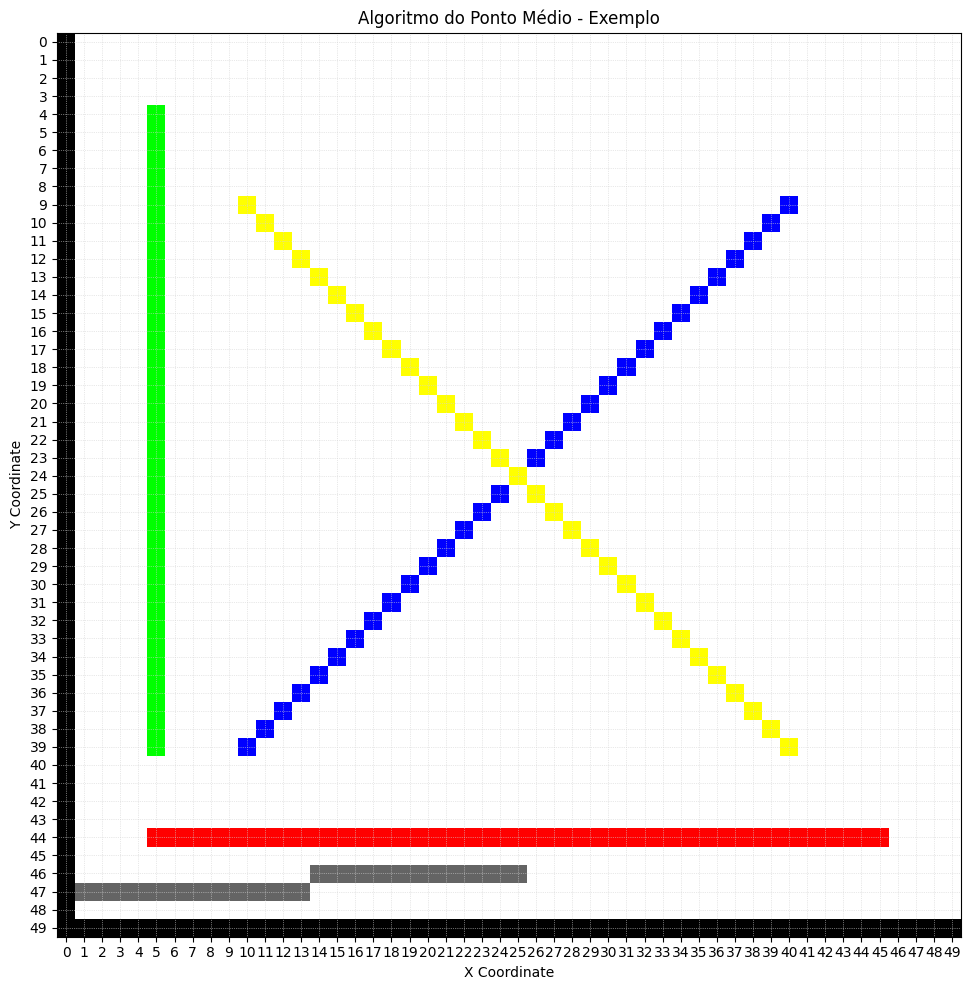

In [8]:
import numpy as np
import matplotlib.pyplot as plt

class PixelCanvasQ1:
    def __init__(self, width=20, height=20, background_color=(255, 255, 255)):
        self.width = width
        self.height = height
        # Cria grid com cor de fundo especificada
        self.grid = np.full((height, width, 3), background_color, dtype=np.uint8)
        self.color_mapping = {}  # Dicionário para mapear valores a cores

    def write_pixel(self, x, y, color):
        """Pinta um pixel com a cor especificada (pode ser valor numérico ou RGB)"""
        if isinstance(color, (int, float)):
            # Se for numérico, usa mapeamento de cores
            self.color_mapping[color] = color  # Simplificado (pode ser expandido)
            color = self._numeric_to_color(color)

        if 0 <= x < self.width and 0 <= y < self.height:
            self.grid[self.height - 1 - int(round(y)), int(round(x))] = color

    def _numeric_to_color(self, value):
        """Converte valor numérico para cor (implementação básica)"""
        # Exemplo: mapeamento para gradiente vermelho
        intensity = int(255 * (value % 1)) if isinstance(value, float) else value % 256
        return (intensity, 0, 0)

    def show(self, title="Pixel Canvas", show_values=False):
        """Exibe o heatmap com configurações limpas"""
        fig, ax = plt.subplots(figsize=(10, 10))

        # Mostra o heatmap
        img = ax.imshow(self.grid,
                       extent=[-0.5, self.width-0.5, -0.5, self.height-0.5],
                       aspect='equal')

        # Configurações do grid
        ax.grid(which='both', color='lightgray', linestyle=':', linewidth=0.5)
        ax.set_xticks(np.arange(0, self.width, 1))
        ax.set_yticks(np.arange(0, self.height, 1))

        # Labels apenas nos eixos
        ax.set_xticklabels(np.arange(0, self.width, 1))
        ax.set_yticklabels(np.arange(self.height-1, -1, -1))  # Eixo Y invertido

        # Opcional: mostra valores nos pixels (se necessário)
        if show_values:
            self._add_pixel_values(ax)

        ax.set_title(title)
        ax.set_xlabel('X Coordinate')
        ax.set_ylabel('Y Coordinate')
        plt.tight_layout()
        plt.show()

    def _add_pixel_values(self, ax):
        """Adiciona valores textuais aos pixels (opcional)"""
        for x in range(self.width):
            for y in range(self.height):
                pixel_value = self.grid[self.height-1-y, x]
                if np.any(pixel_value != 255):  # Se não for fundo branco
                    ax.text(x, y, f'({x},{y})', ha='center', va='center',
                           fontsize=8, color='black')

def draw_line(canvas, x1, y1, x2, y2, color=(255, 0, 0)):
    """Desenha uma linha do ponto (x0, y0) até (x1, y1) usando o algoritmo do ponto médio"""

    # Verifica se os pontos são iguais
    if x1 == x2 and y1 == y2:
        # plot_point(x1, y1)
        canvas.write_pixel(x1, y1, color)
        return

    # Verifica linhas paralelas aos eixos
    if x1 == x2:  # Linha vertical
        step = 1 if y2 > y1 else -1
        for y in range(y1, y2 + step, step):
            # plot_point(x1, y)
            canvas.write_pixel(x1, y, color)
        return

    if y1 == y2:  # Linha horizontal
        step = 1 if x2 > x1 else -1
        for x in range(x1, x2 + step, step):
            # plot_point(x, y1)
            canvas.write_pixel(x, y1, color)
        return

    # Calcula diferenças e direções
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1

    # Decide se iteramos sobre x ou y
    if dx > dy:
        # Iteração sobre x
        err = dx / 2
        while x1 != x2:
            # plot_point(x1, y1)
            canvas.write_pixel(x1, y1, color)
            err -= dy
            if err < 0:
                y1 += sy
                err += dx
            x1 += sx
        # plot_point(x2, y2)
        canvas.write_pixel(x2, y2, color)
    else:
        # Iteração sobre y
        err = dy / 2
        while y1 != y2:
            # plot_point(x1, y1)
            canvas.write_pixel(x1, y1, color)
            err -= dx
            if err < 0:
                x1 += sx
                err += dy
            y1 += sy
        # plot_point(x2, y2)
        canvas.write_pixel(x2, y2, color)



# Exemplo de uso
# if __name__ == "__main__":
canvas = PixelCanvasQ1(width=50, height=50)

# Desenhando os eixos
draw_line(canvas, 0, 0, 0, 49, (0,0,0))
draw_line(canvas, 0, 0, 49, 0, (0,0,0))

# Desenha algumas linhas de exemplo
draw_line(canvas, 5, 5, 45, 5, (255, 0, 0))    # Linha horizontal vermelha
draw_line(canvas, 5, 10, 5, 45, (0, 255, 0))    # Linha vertical verde
draw_line(canvas, 10, 10, 40, 40, (0, 0, 255))  # Linha diagonal azul
draw_line(canvas, 40, 10, 10, 40, (255, 255, 0)) # Linha diagonal amarela

draw_line(canvas, 1, 2, 25, 3, (100, 100, 100))
# Mostra o resultado
canvas.show("Algoritmo do Ponto Médio - Exemplo")

## PixelCanvas com 4 quadrantes

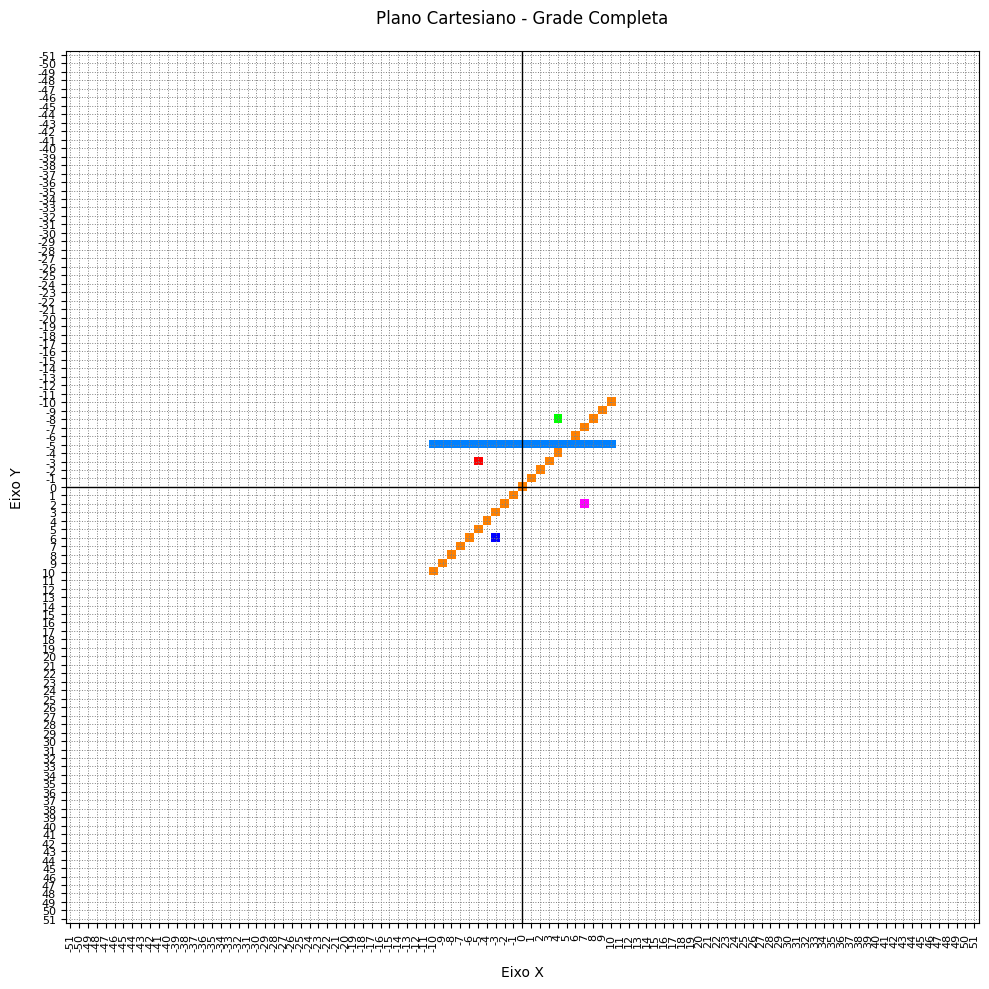

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

class PixelCanvas:
    def __init__(self, x_range=(-10, 10), y_range=(-10, 10), background_color=(255, 255, 255)):
        """
        Cria um canvas cartesiano que abrange 4 quadrantes

        Parâmetros:
        x_range (tuple): (x_min, x_max) - intervalo do eixo X
        y_range (tuple): (y_min, y_max) - intervalo do eixo Y
        background_color (tuple): cor RGB do fundo
        """
        self.x_min, self.x_max = x_range
        self.y_min, self.y_max = y_range

        # Calcula dimensões baseadas nos ranges
        self.width = self.x_max - self.x_min + 1
        self.height = self.y_max - self.y_min + 1

        # Cria grid com cor de fundo
        self.grid = np.full((int(self.height), int(self.width), 3), background_color, dtype=np.uint8)

        # Configurações de visualização
        self.origin_x = -self.x_min
        self.origin_y = -self.y_min

    def write_pixel(self, x, y, color):
        """Pinta um pixel na posição cartesiana (x,y) com a cor especificada"""
        try:
            # Converte coordenadas cartesianas para índices da matriz
            x_idx = int(round(x - self.x_min))
            y_idx = int(round(self.y_max - y))  # Inverte o eixo Y

            if 0 <= x_idx < self.width and 0 <= y_idx < self.height:
                self.grid[y_idx, x_idx] = color
        except:
            pass  # Ignora coordenadas fora do grid

    def show(self, title="Plano Cartesiano - Grade Completa"):
        """Exibe o canvas com todos os labels e linhas de grade"""
        fig, ax = plt.subplots(figsize=(10, 10))

        # Configuração do heatmap
        extent = [self.x_min-0.5, self.x_max+0.5, self.y_min-0.5, self.y_max+0.5]
        ax.imshow(self.grid, extent=extent, aspect='auto', origin='upper')

        # Linhas dos eixos principais
        ax.axhline(0, color='black', linewidth=1)
        ax.axvline(0, color='black', linewidth=1)

        # Grade completa - todas as unidades
        ax.set_xticks(np.arange(self.x_min, self.x_max+1, 1))
        ax.set_yticks(np.arange(self.y_min, self.y_max+1, 1))

        # Labels para todos os valores
        ax.set_xticklabels([str(x) for x in range(self.x_min, self.x_max+1)])
        ax.set_yticklabels([str(y) for y in range(self.y_max, self.y_min-1, -1)])

        # Estilo da grade
        ax.grid(True, linestyle=':', color='gray', linewidth=0.7)

        # Ajustes de visualização
        plt.xticks(rotation=90, fontsize=8)
        plt.yticks(fontsize=8)
        ax.set_title(title, pad=20)
        ax.set_xlabel("Eixo X", labelpad=10)
        ax.set_ylabel("Eixo Y", labelpad=10)

        plt.tight_layout()
        plt.show()

# Cria canvas cobrindo os 4 quadrantes
canvas = PixelCanvas(x_range=(-51, 51), y_range=(-51, 51))

# Desenha elementos nos 4 quadrantes
canvas.write_pixel(-5, 3, (255, 0, 0))    # Quadrante II
canvas.write_pixel(4, 8, (0, 255, 0))     # Quadrante I
canvas.write_pixel(-3, -6, (0, 0, 255))   # Quadrante III
canvas.write_pixel(7, -2, (255, 0, 255))  # Quadrante IV

# Desenha linhas cruzando os quadrantes
draw_line(canvas, -10, -10, 10, 10, (255, 128, 0))  # Diagonal principal
draw_line(canvas, -10, 5, 10, 5, (0, 128, 255))     # Horizontal

canvas.show()